In [1]:
# import stuff
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np

In [2]:
# creating file paths to csv files
mouse_file = os.path.join('data','Mouse_metadata.csv')
study_file = os.path.join('data','Study_results.csv')
#creating dataframes for each file
mouse_df = pd.read_csv(mouse_file)
study_results_df = pd.read_csv(study_file)
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# creating (inner) merged data frame using Mouse ID common thing 
mice_study = mouse_df.merge(study_results_df, on='Mouse ID', how='inner')
mice_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
mice_study['Mouse ID'].nunique()

249

### Cleaning Data

In [6]:
# this was my old way of cleaning up the data (getting rid of that mouse that was doubled)
# it worked but te new way i think works better.

# get mouse id for duplicate time points
# mouse_bool = mice_study[['Mouse ID','Timepoint']].duplicated()
# mouse_bool.head()
# mouse_id = [mice_study['Mouse ID'][cheese] for cheese in range(0,len(mouse_bool)) if (mouse_bool[cheese] == True)]
# mouse_id

#look at that. there are a bunch of repeated values in there.
# mice_study.loc[mice_study['Mouse ID'] == 'g989', :].head()

# dropping dirty mouse
# clean_mice = mice_study.loc[mice_study['Mouse ID'] != 'g989', :]
# clean_mice.head()

# there is one less mouse
# clean_mice.nunique()

# clean_mice.count()

# clean_mice.dtypes

['g989', 'g989', 'g989', 'g989', 'g989']

In [39]:
# trying another method because mine is strange (Alyssa K gave me the spring board of a 
# groupby two things on a slack thread)
micems = mice_study.groupby(['Mouse ID','Timepoint'])
meese_id = micems.count().loc[micems['Timepoint'].count() > 1, :]
meese_id
# wow that works alot better

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [40]:
unclean_mouse_id = meese_id.index[0][0]
unclean_mouse_id

'g989'

In [41]:
clean_mice = mice_study.loc[mice_study['Mouse ID'] != unclean_mouse_id, :]
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [12]:
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# making groupby object on drug regimen
drug_group = clean_mice.groupby('Drug Regimen')
drug_group

looking at tumor size by drug regimen

In [14]:
# finding mean (Mean Tumor Volum (mm3))
drug_mean = drug_group['Tumor Volume (mm3)'].mean()
drug_mean.head(3)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# finding median (Median Tumor Volume (mm3))
drug_median = drug_group['Tumor Volume (mm3)'].median()
drug_median.head(3)

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# finding variance (Variance of Tumor Volume (mm6))
drug_var = drug_group['Tumor Volume (mm3)'].var()
drug_var.head(3)

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# finding standard deviation (Std. Dev. of Tumor Volume (mm3))
drug_std = drug_group['Tumor Volume (mm3)'].std()
drug_std.head(3)

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# finding SEM (SEM of Tumor Volume (mm3))
drug_sem = drug_group['Tumor Volume (mm3)'].sem()
drug_sem.head(3)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# getting index
drug_index = drug_group['Drug Regimen'].unique()
drug_index = pd.Series(drug_index)
drug_index = drug_index.str[0]

In [20]:
# making summary table of statistics
drug_stats_dict = {
    'Mean Tumor Volum (mm3)': drug_mean,
    'Median Tumor Volume (mm3)': drug_median,
    'Variance of Tumor Volume (mm6)': drug_var,
    'Std. Dev. of Tumor Volume (mm3)': drug_std,
    'SEM of Tumor Volume (mm3)': drug_sem
}

# make statistical summary table
drug_stats = pd.DataFrame(drug_stats_dict, index=drug_index)
drug_stats

,Mean Tumor Volum (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm6),Std. Dev. of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


i am interested to see if going back later and only looking at the last time point for each mouse would decrease the the std. deviation and sem, because the drugs are suppose to decrease the size of tumors over time so by looking at whole data set we are introducing a lot of error. and seems just like the wrong way to do it.

### same thing with aggregate functionality

In [21]:
agg_drug_stats = drug_group['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
agg_drug_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


awesome how it does the same thing. with a few more lines i could even change column titles to make it exactly identical.

# Bars and Pie Charts

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_meas = drug_group['Timepoint'].count()
num_meas.head(3)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Name: Timepoint, dtype: int64

In [23]:
x_axis = np.arange(len(drug_index))
tick_location = [value for value in x_axis]

In [24]:
# this should help with my list object not callable typeerror
drug_array = drug_index.to_numpy()
drug_array

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

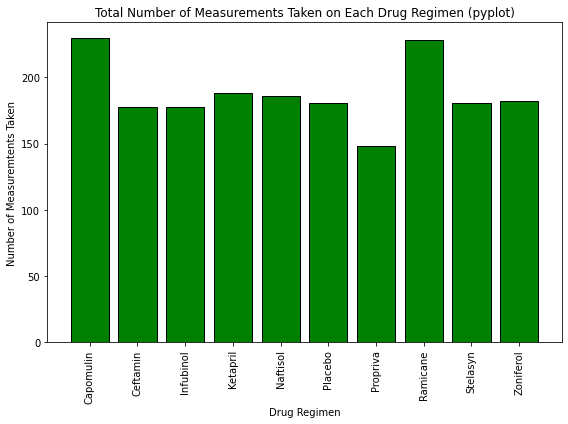

In [25]:
# plotting count of total measurments for each drug regiment using Matplotlib
plt.figure(figsize=(8,6))
plt.bar(x_axis, num_meas, color='g', edgecolor='black')
plt.xticks(tick_location, drug_array, rotation=90)
plt.title('Total Number of Measurements Taken on Each Drug Regimen (pyplot)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measuremtents Taken')
plt.tight_layout()
plt.show()

In [26]:
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


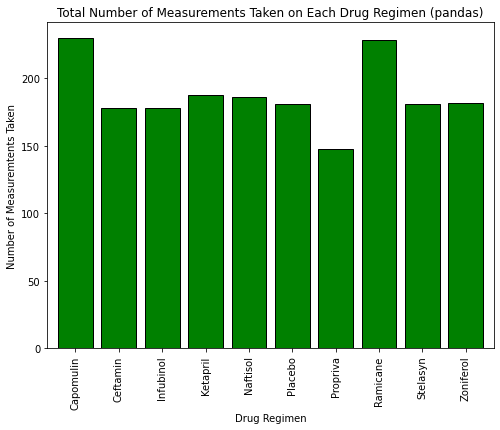

In [27]:
# plotting count of total measurments for each drug regiment using panda
num_meas.plot(kind='bar', figsize=(8,6), color='g', width=.8, edgecolor='black',
              title='Total Number of Measurements Taken on Each Drug Regimen (pandas)')
plt.ylabel('Number of Measuremtents Taken')
plt.show()

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# making series to work on
gender_group = clean_mice.groupby('Sex')
num_gender = gender_group['Sex'].count()
num_gender

Sex
Female    922
Male      958
Name: Sex, dtype: int64

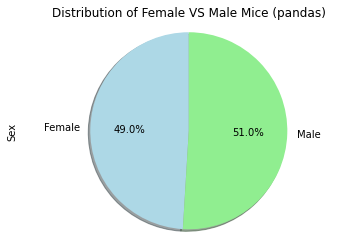

In [29]:
# creating pie chart
color = ['lightblue','lightgreen']
num_gender.plot(kind='pie', y='Sex', title='Distribution of Female VS Male Mice (pandas)', startangle=90,
               autopct='%1.1f%%', shadow=True, colors=color)
plt.axis('equal')
plt.show()

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# making labels
g_labels = gender_group['Sex'].unique()
pd.Series(g_labels)
g_labels = g_labels.str[0]

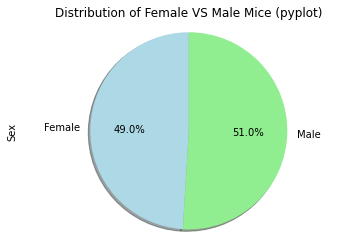

In [31]:
# making plot with pyplot
plt.pie(num_gender, labels=g_labels, shadow=True, colors=color, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female VS Male Mice (pyplot)')
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

# Quartiles, Outliers and Boxplots

In [48]:
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [57]:
# making list of all drugs i want to include
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# making new df that only includes them
drug_df = clean_mice.loc[(clean_mice['Drug Regimen'] == drugs[0]) | 
                         (clean_mice['Drug Regimen'] == drugs[1]) |
                         (clean_mice['Drug Regimen'] == drugs[2]) | 
                         (clean_mice['Drug Regimen'] == drugs[3]), :]
drug_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [65]:
# now i group by mouse and find greatest timepoint
mousy_group = drug_df.groupby('Mouse ID')
final_tumor = mousy_group['Timepoint'].max()
final_tumor.head()

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
Name: Timepoint, dtype: int64

In [72]:
# just ignore this whole bit

# final_tumor_df = drug_df.loc[([drug_df['Mouse ID'] == i for i in final_tumor.index]) and
#                                ([drug_df['Timepoint'] == x for x in final_tumor]), :] 
# that might be a little to abitiuos (and doesn't work)
# final_tumor_df = drug_df.loc[drug_df['Timepoint'] == 45, :]
# final_tumor_df.head()
# new df that is only those four drugs and final tumor sizes

In [78]:
# merging on both mouse id and timepoint to get only those mice and timepoints
final_tumor_mice = clean_mice.merge(final_tumor, how='inner', on= ['Mouse ID','Timepoint'])
final_tumor_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [100]:
# Put treatments into a list for for loop (and later for plot labels)
# drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
quartiles = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # tumor_vol_data is a list of lists of the data corrisonding to each drug
    tumor_this_drug = final_tumor_mice.loc[final_tumor_mice['Drug Regimen'] == drug, 'Tumor Volume (mm3)'])
    
    
    # Determine outliers using upper and lower bounds
    quartiles = .quantiles([0.25,0.5,0.75])
    
    

AttributeError: 'list' object has no attribute 'quantiles'

<built-in method index of list object at 0x00000216825B4108>
